#Introducing the Project

In [ ]:
# Import the Pandas library
import pandas as pd

In [ ]:
df_holidays = pd.read_csv('holidays_events - holidays_events .csv')
display(df_holidays.head())

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
df_items = pd.read_csv('items - items.csv')
display(df_items.head())

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [ ]:
df_oil = pd.read_csv('oil - oil.csv')
display(df_oil.head())

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
df_stores = pd.read_csv('stores - stores.csv')
display(df_stores.head())

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
df_transactions = pd.read_csv('transactions - transactions.csv')
display(df_transactions.head())

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv', nrows=2e6, low_memory=False)
display(df_train.head())

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,34,115850,2013-01-02,25767.0,6.0,False,2013,1,2,2,NaN
1,30,321798,2013-01-02,23302.0,1.0,False,2013,1,2,2,NaN
2,35,819195,2013-01-02,26945.0,1.0,False,2013,1,2,2,NaN
3,24,959500,2013-01-02,19641.0,5.0,False,2013,1,2,2,NaN
4,35,683721,2013-01-02,26892.0,3.0,False,2013,1,2,2,NaN


Now, we need to filter out the data to get only Guayas region

In [ ]:
# Select list of stores located in the 'Guayas' region
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()

# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('train.csv', chunksize=chunk_size, dtype={'onpromotion': object}):
    # Convert string representations of boolean values to actual boolean values
    chunk['onpromotion'] = chunk['onpromotion'].map({'True': True, 'False': False, None: None})
    # Convert 'onpromotion' column to nullable boolean
    chunk['onpromotion'] = chunk['onpromotion'].astype('boolean')
    # Filter the chunk for the desired store IDs
    chunk_filtered = chunk[chunk['store_nbr'].isin(store_ids)]
    # Append the filtered chunk to the list
    filtered_chunks.append(chunk_filtered)
    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks

In [ ]:
# Shape of the data
df_train.shape

(300000, 11)

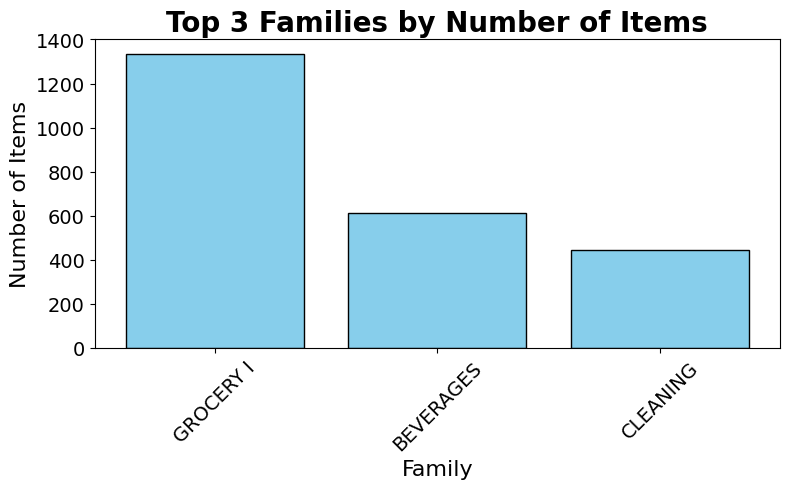

In [ ]:
# Importing package
import matplotlib.pyplot as plt

# Plotting the number of items per family (for top 3 families only)
# Compute the number of items per family and select the top 3 families
items_per_family = df_items['family'].value_counts().reset_index()
items_per_family.columns = ['Family', 'Item Count']
top_3_families = items_per_family.head(3)  # Keep only the top 3 families

# Plot the top 10 families
plt.figure(figsize=(8, 5))
plt.bar(top_3_families['Family'], top_3_families['Item Count'], color='skyblue', edgecolor='black')
plt.title("Top 3 Families by Number of Items", fontsize=20, fontweight='bold')
plt.xlabel("Family", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
# Filtering the data
item_ids = df_items[df_items['family'].isin(top_3_families['Family'].unique())]['item_nbr'].unique()
df_train = df_train[df_train['item_nbr'].isin(item_ids)]

In [ ]:
# Shape of the data (after we filtered)
df_train.shape

(300000, 11)

In [ ]:
# Checking missing values
df_train.isnull().sum()

,0
store_nbr,0
item_nbr,0
date,0
id,0
unit_sales,0
onpromotion,0
year,0
month,0
day,0
day_of_week,0


In [ ]:
# Focusing on missing values in the 'onpromotion' column, rename it False
df_train.loc[:, 'onpromotion'] = df_train['onpromotion'].fillna(False)

In [ ]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,34,115850,2013-01-02,25767.0,6.0,False,2013,1,2,2,NaN
1,30,321798,2013-01-02,23302.0,1.0,False,2013,1,2,2,NaN
2,35,819195,2013-01-02,26945.0,1.0,False,2013,1,2,2,NaN
3,24,959500,2013-01-02,19641.0,5.0,False,2013,1,2,2,NaN
4,35,683721,2013-01-02,26892.0,3.0,False,2013,1,2,2,NaN


In [ ]:
# Checking for negative sales (returns)
negative_sales = df_train[df_train['unit_sales'] < 0]

negative_sales.head()  # Viewing negative sales for analysis

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg


In [ ]:
# Function to calculate Z-score for each group (store-item combination)
def calculate_store_item_zscore(group):
    # Compute mean and standard deviation for each store-item group
    mean_sales = group['unit_sales'].mean()
    std_sales = group['unit_sales'].std()

    # Calculate Z-score (avoiding division by zero for standard deviation)
    group['z_score'] = (group['unit_sales'] - mean_sales) / (std_sales if std_sales != 0 else 1)
    return group

In [ ]:
df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)
df_train_grouped.reset_index(drop=True, inplace=True)

/tmp/ipython-input-3380579669.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)


In [ ]:
# Define threshold for outliers (e.g., Z-score > 5)
outliers = df_train_grouped[df_train_grouped['z_score'] > 5]
outliers

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,z_score
454,24,114790,2016-10-30,95387674.0,34.0,True,2016,10,30,6,17.000000,5.074590
1421,24,158789,2016-04-19,76753101.0,100.0,False,2016,4,19,1,16.857143,5.549498
2273,24,207857,2017-07-26,123337370.0,130.0,True,2017,7,26,2,122.428571,5.844470
5514,24,315277,2015-11-10,61706923.0,102.0,False,2015,11,10,1,21.142857,5.529868
7903,24,411557,2013-12-15,15510711.0,72.0,False,2013,12,15,6,13.428571,5.426277
...,...,...,...,...,...,...,...,...,...,...,...,...
274063,51,502230,2016-12-17,100272937.0,52.0,True,2016,12,17,5,42.857143,5.501167
275228,51,564110,2017-04-03,111334762.0,82.0,True,2017,4,3,0,17.000000,5.302110
280650,51,847863,2014-12-05,36726282.0,109.0,False,2014,12,5,4,21.857143,5.952794
286564,51,1070962,2017-01-05,102118957.0,75.0,True,2017,1,5,3,14.714286,5.512550


In [ ]:
# Convert 'date' column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

# Get the minimum and maximum dates in the dataset to create a full date range
min_date = df_train['date'].min()
max_date = df_train['date'].max()

# Get full date range
full_date_range = pd.DataFrame({'date': pd.date_range(min_date, max_date, freq='D')})
full_date_range

,date
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-05
4,2013-01-06
...,...
1682,2017-08-11
1683,2017-08-12
1684,2017-08-13
1685,2017-08-14


In [ ]:
# Create a DataFrame with all (store, item, date) combinations
store_item_combinations = df_train[['store_nbr', 'item_nbr']].drop_duplicates()
all_combinations = store_item_combinations.merge(full_date_range, how='cross')
all_combinations

,store_nbr,item_nbr,date
0,34,115850,2013-01-02
1,34,115850,2013-01-03
2,34,115850,2013-01-04
3,34,115850,2013-01-05
4,34,115850,2013-01-06
...,...,...,...
33238956,36,2113343,2017-08-11
33238957,36,2113343,2017-08-12
33238958,36,2113343,2017-08-13
33238959,36,2113343,2017-08-14


In [ ]:
# Merge with original data to fill missing dates
df_filled = all_combinations.merge(df_train, on=['store_nbr', 'item_nbr', 'date'], how='left')

# Fill missing sales values with 0
df_filled['unit_sales'] = df_filled['unit_sales'].fillna(0)

# Check the first few rows
df_filled.head(5)

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,34,115850,2013-01-02,25767.0,6.0,False,2013.0,1.0,2.0,2.0,NaN
1,34,115850,2013-01-03,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN
2,34,115850,2013-01-04,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN
3,34,115850,2013-01-05,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN
4,34,115850,2013-01-06,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replace the df_filled with df_train
df_train = df_filled
del df_filled

In [ ]:
# Convert date column to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Creating new time-based variables (columns)
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek

In [ ]:
# Calculating rolling average of unit_sales
df_train['unit_sales_7d_avg'] = df_train.groupby(['item_nbr', 'store_nbr'])['unit_sales'].transform(lambda x: x.rolling(window=7).mean())

In [ ]:
df_train.head(10)

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,34,115850,2013-01-02,25767.0,6.0,False,2013,1,2,2,NaN
1,34,115850,2013-01-03,NaN,0.0,NaN,2013,1,3,3,NaN
2,34,115850,2013-01-04,NaN,0.0,NaN,2013,1,4,4,NaN
3,34,115850,2013-01-05,NaN,0.0,NaN,2013,1,5,5,NaN
4,34,115850,2013-01-06,NaN,0.0,NaN,2013,1,6,6,NaN
5,34,115850,2013-01-07,230403.0,3.0,False,2013,1,7,0,NaN
6,34,115850,2013-01-08,NaN,0.0,NaN,2013,1,8,1,1.285714
7,34,115850,2013-01-09,NaN,0.0,NaN,2013,1,9,2,0.428571
8,34,115850,2013-01-10,NaN,0.0,NaN,2013,1,10,3,0.428571
9,34,115850,2013-01-11,NaN,0.0,NaN,2013,1,11,4,0.428571


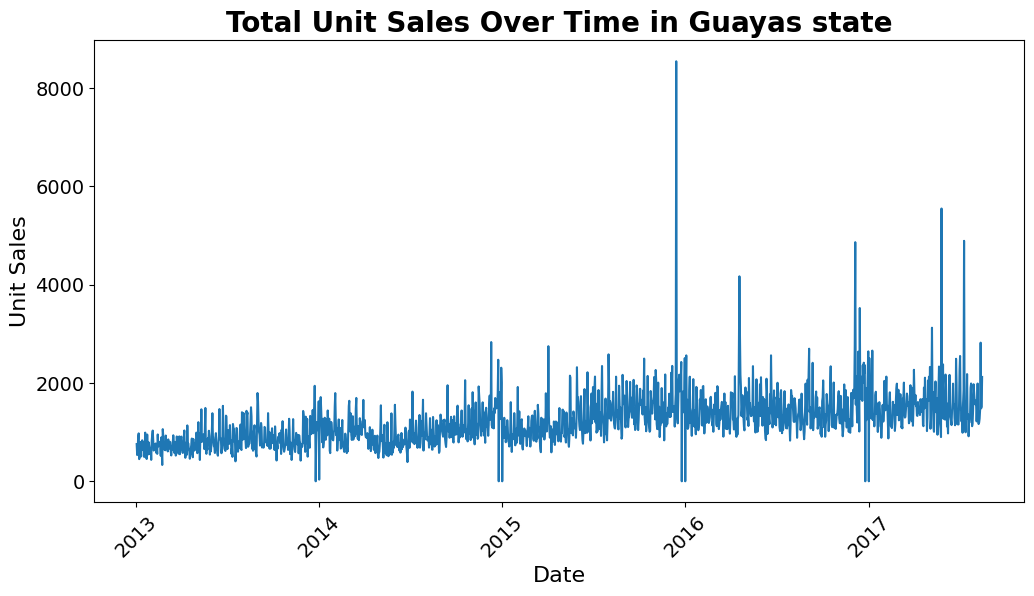

In [ ]:
# Aggregating total sales by date
sales_by_date = df_train.groupby('date')['unit_sales'].sum()

# Plotting the time-series
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Unit Sales Over Time in Guayas state', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unit Sales', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

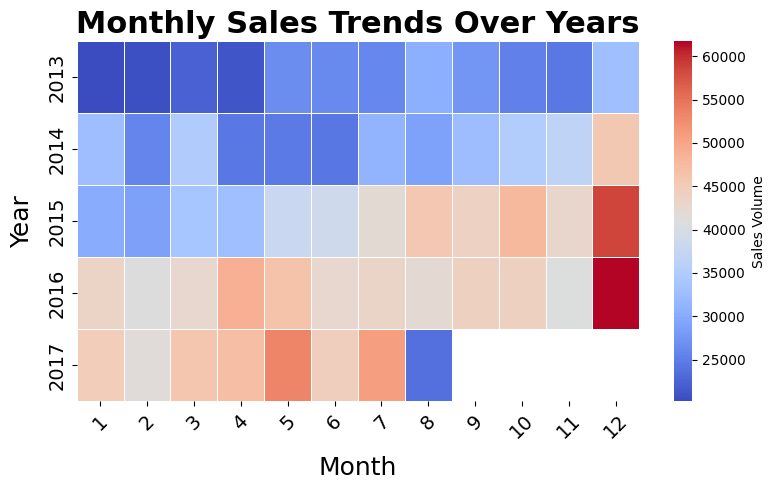

In [ ]:
# Aggregating sales by year and month
sales_by_month = df_train.groupby(['year', 'month'])['unit_sales'].sum().unstack()

# Plotting heatmap of sales by year and month
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Increase figure size for better visibility
sns.heatmap(
    sales_by_month,
    cmap='coolwarm',  # Use a diverging colormap for better contrast
    linewidths=0.5,  # Add lines between cells for clarity
    linecolor='white',  # Use white lines for a cleaner look
    cbar_kws={'label': 'Sales Volume'}  # Add a descriptive colorbar label
)

# Customizing title and axes labels
plt.title('Monthly Sales Trends Over Years', fontsize=22, fontweight='bold')
plt.xlabel('Month', fontsize=18, labelpad=10)  # Labelpad adds spacing
plt.ylabel('Year', fontsize=18, labelpad=10)

# Formatting tick labels
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()

In [ ]:
# Convert date column to datetime
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
print("Holidays range: from",df_holidays['date'].dt.date.min(),"till",df_holidays['date'].dt.date.max())

NameError: name 'df_holidays' is not defined

In [ ]:
# Read the holidays data again as it was not executed in the current runtime
df_holidays = pd.read_csv('holidays_events - holidays_events .csv')

# Convert date column to datetime
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

In [ ]:
df_train_no_zero = df_train[df_train.unit_sales > 0]
sample = df_train_no_zero.sample(n=300_000, random_state=42)

In [ ]:
# Merging df_train with zero sales with data with holidays
df_holidays = pd.merge(sample, df_holidays, on='date', how='left')

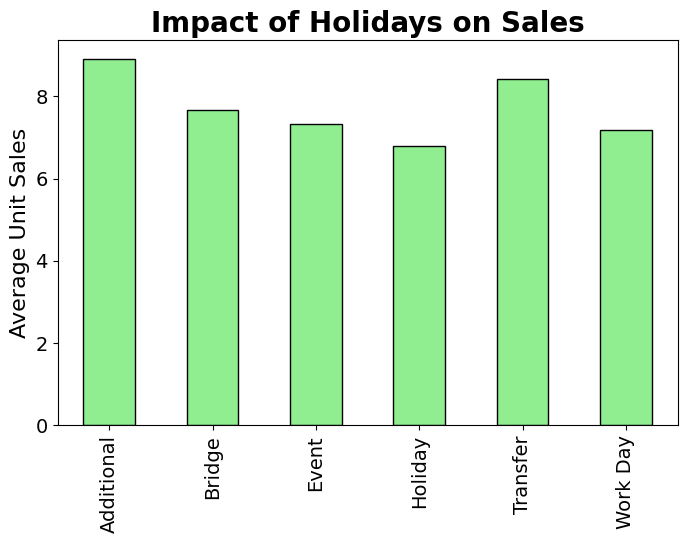

In [ ]:
# Aggregating sales by holiday and non-holiday
holiday_sales = df_holidays.groupby('type')['unit_sales'].mean()

# Plotting holiday impact
plt.figure(figsize=(8,5))
holiday_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Impact of Holidays on Sales', fontsize=20, fontweight='bold')
plt.ylabel('Average Unit Sales', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# **Feature Engineering**

In [ ]:
# Convert date column to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Time-based features
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek
df_train['is_weekend'] = df_train['day_of_week'].isin([5,6]).astype(int)

# Lag features
df_train['unit_sales_1d_lag'] = df_train.groupby(['store_nbr','item_nbr'])['unit_sales'].shift(1)
df_train['unit_sales_7d_lag'] = df_train.groupby(['store_nbr','item_nbr'])['unit_sales'].shift(7)

# Rolling average features
df_train['unit_sales_7d_avg'] = df_train.groupby(['store_nbr','item_nbr'])['unit_sales'].transform(lambda x: x.rolling(7).mean())
df_train['unit_sales_30d_avg'] = df_train.groupby(['store_nbr','item_nbr'])['unit_sales'].transform(lambda x: x.rolling(30).mean())

Lag features → capture recent sales trend

Rolling averages → smooth noisy sales data

Day-of-week & weekend → capture weekly patterns

#Merge Holiday Information

In [ ]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_train = df_train.merge(df_holidays[['date','type']], on='date', how='left')
df_train['is_holiday'] = df_train['type'].notna().astype(int)


Holidays impact sales significantly.

Creates binary feature is_holiday for modeling.

# Exploratory Visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total sales over time
sales_by_date = df_train.groupby('date')['unit_sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title("Total Sales Over Time")
plt.show()

# Monthly heatmap
sales_month = df_train.groupby(['year','month'])['unit_sales'].sum().unstack()
sns.heatmap(sales_month, cmap='coolwarm', linewidths=0.5)
plt.title("Monthly Sales Trends")
plt.show()

# Holiday impact
holiday_sales = df_train.groupby('is_holiday')['unit_sales'].mean()
holiday_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Impact of Holidays on Sales")
plt.show()
#Visualize trends, seasonality, and holiday effects to guide modeling.

# #Prepare Data for Modeling

In [ ]:
# Select features and target
features = ['store_nbr','item_nbr','onpromotion','year','month','day','day_of_week','is_weekend',
            'unit_sales_1d_lag','unit_sales_7d_lag','unit_sales_7d_avg','unit_sales_30d_avg','is_holiday']
target = 'unit_sales'

# Train-validation split (last 3 months as validation)
train_df = df_train[df_train['date'] < '2017-07-01']
valid_df = df_train[df_train['date'] >= '2017-07-01']


Ensure temporal split (no leakage from future to past).

Features include promotions, lagged sales, rolling averages, time-based, and holiday indicators.